In [1]:
#show path
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import glob
import ComputationalHypergraphDiscovery as CHD
import jax
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import jax.numpy as np

# Recover the data and reconstruct the graph found by CHD

In [3]:

df=pd.read_csv('./data_and_results/BCR.csv')
targets=df.columns[1122:]
cut=2400
df_test=df[cut:]
df_test

,S0,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,$/partial_t S1112$,$/partial_t S1113$,$/partial_t S1114$,$/partial_t S1115$,$/partial_t S1116$,$/partial_t S1117$,$/partial_t S1118$,$/partial_t S1119$,$/partial_t S1120$,$/partial_t S1121$
2400,29981.147367,2.969627e+04,29696.311806,2.941446e+04,3.000000e+04,30000.000000,8.903285e+00,0.141295,0.175596,8.903297e+00,...,1.625153e-14,6.181143e-29,6.264580e-22,7.936764e-20,5.080047e-10,1.448316e-16,1.183118e-07,2.500229e-07,1.737413e-19,5.068340e-13
2401,119692.037231,1.154039e+05,115403.303765,1.112722e+05,1.199999e+05,119999.999936,1.381298e+02,1.314677,2.256829,1.381291e+02,...,4.917985e-12,2.243914e-25,1.180850e-18,6.687115e-17,1.226164e-05,2.402417e-13,9.962439e-06,3.317291e-05,4.294697e-14,1.222357e-08
2402,89813.994177,8.735980e+04,87359.531309,8.497517e+04,8.999987e+04,89999.999951,7.846145e+01,0.883921,1.500723,7.846123e+01,...,2.364440e-12,4.591415e-26,1.402956e-18,2.878856e-17,5.072945e-07,6.473879e-14,1.119249e-05,2.477625e-05,7.513643e-16,5.060874e-10
2403,89828.691861,8.736840e+04,87368.122964,8.497709e+04,8.999997e+04,89999.999985,7.848204e+01,0.857160,1.348434,7.848181e+01,...,1.790904e-12,5.281555e-26,2.886907e-19,2.011864e-17,4.241557e-06,7.671068e-14,4.411336e-06,1.372695e-05,1.126719e-14,4.228810e-09
2404,298038.881532,2.739719e+05,273967.281060,2.518821e+05,2.999996e+05,299999.995478,8.165601e+02,4.409698,9.855372,8.165473e+02,...,7.743064e-11,1.141953e-23,2.960573e-17,1.691826e-15,2.328992e-04,4.320298e-12,6.393255e-05,3.057887e-04,1.709506e-12,2.320090e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,0.000002,1.115007e+06,974531.302015,3.526420e+06,7.075370e+06,341835.359312,1.769014e-09,16984.587413,161878.040296,1.554103e-09,...,2.343143e-04,2.910494e-08,2.970329e-06,5.085564e-05,1.635863e+02,1.075838e-02,4.861911e+01,2.130331e+02,5.524407e-03,1.715411e-01
5001,297148.127742,2.735912e+05,273583.446419,2.519036e+05,2.999944e+05,299999.936688,8.129941e+02,4.703674,14.391908,8.129719e+02,...,1.690567e-10,3.790267e-23,1.342285e-15,7.824249e-15,4.464824e-05,1.354047e-11,6.387906e-04,1.450940e-03,2.828985e-13,4.454087e-08
5002,0.000006,1.774727e+03,1420.282767,3.076068e+06,3.791961e+06,238032.895425,9.719790e-12,5020.205605,8163.711747,8.458764e-12,...,-4.378077e-03,8.244811e-07,-2.500028e-04,-5.748210e-04,-2.049486e+01,-1.760463e-03,-3.577294e+01,-6.933246e+01,2.478592e-04,-2.077291e-02
5003,0.000006,1.772895e+03,1418.532250,3.074676e+06,3.790500e+06,238033.025601,9.717387e-12,5016.628520,8156.249045,8.455209e-12,...,-4.356279e-03,8.249133e-07,-2.500649e-04,-5.732107e-04,-2.039048e+01,-1.746116e-03,-3.585287e+01,-6.938882e+01,2.543894e-04,-2.066849e-02


We will now look at the accuracy of our recovery to see if we still get good results to predict the variables of the graph. 

# Computing the accuracy of the recovery

In [4]:
# Deserialize the graph discovery object
import joblib
graph_discovery=joblib.load("BCR.pkl")

In [5]:
pred = graph_discovery.predict(targets,df_test.values)
truth=df_test[targets].values
std=np.std(truth,axis=0)
errors= jax.numpy.quantile((truth-pred)**2,0.99,axis=0)/std**2

In [6]:
true_graph=pickle.load(open('./data_and_results/BCR.pkl','rb'))
ancestors=np.array([len(nx.ancestors(true_graph,node)) for node in targets])

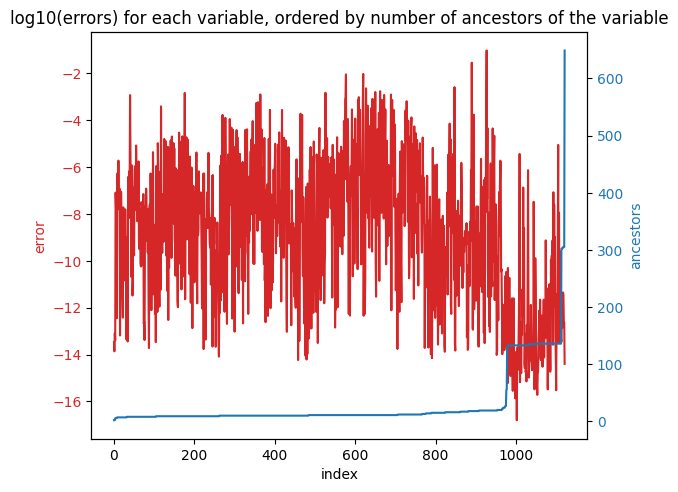

In [7]:
#plot two plots with different y axis
fig, ax1 = plt.subplots()
indexes=np.argsort(ancestors)

color = 'tab:red'
ax1.set_xlabel('index')
ax1.set_ylabel('error', color=color)
ax1.plot(np.log10(errors)[indexes], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('ancestors', color=color)  # we already handled the x-label with ax1
ax2.plot((ancestors)[indexes], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('log10(errors) for each variable, ordered by number of ancestors of the variable')
plt.show()

The error seems to depend very little on the true number of ancestors. When looking at the errors per sample, we notice that there is a few outliers that are the cause of most of the observed error. 

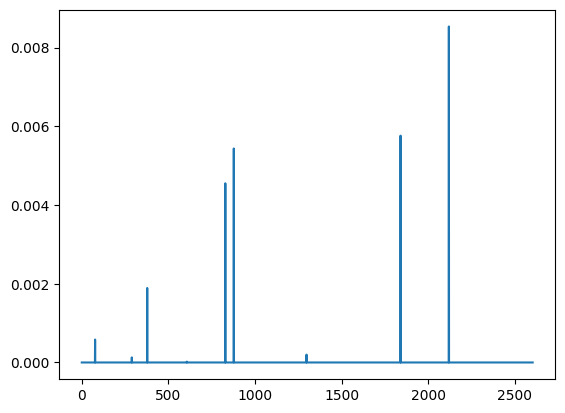

In [8]:
errors_per_sample= jax.numpy.median((truth-pred)**2/std[None,:]**2,axis=1)
plt.plot(errors_per_sample)

# No pruning
We may now compare the accuracy we got to the accuracy one gets without pruning. 

In [9]:
active_mode = np.array([1]*(graph_discovery.X.shape[1]//2)+[0]*(graph_discovery.X.shape[1]//2))
K_mat=graph_discovery.kernels[0](graph_discovery.X,graph_discovery.X,active_mode)
gamma=100
ybs=jax.scipy.linalg.solve(K_mat+gamma*np.eye(K_mat.shape[0]),graph_discovery.X,assume_a='pos')
ybs=ybs[:,1122:]

In [10]:
normalized_test_values=(df_test.values- graph_discovery.mean_x) / graph_discovery.std_x
K_pred=graph_discovery.kernels[0](normalized_test_values,graph_discovery.X,active_mode)
pred_no_pruning=K_pred@ybs
pred_no_pruning=(pred_no_pruning*graph_discovery.std_x[:,1122:])+graph_discovery.mean_x[:,1122:]
diffs_no_pruning=(df_test[targets].values-pred_no_pruning)

Pruning improves the accuracy of the recovery

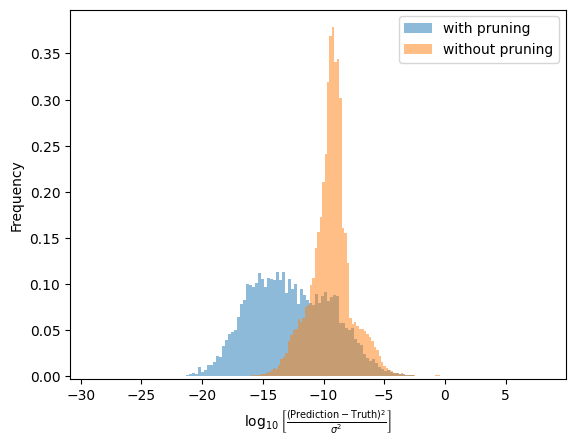

In [11]:
pruning_errors=((truth-pred)**2/std**2).flatten()
no_pruning_errors=((diffs_no_pruning)**2/std**2).flatten()

plt.hist(np.log10(pruning_errors),bins=150,alpha=0.5,label='with pruning',density=True)
plt.hist(np.log10(no_pruning_errors),bins=150,alpha=0.5,label='without pruning',density=True)

plt.xlabel('$\\log_{10}\\left[\\frac{(\\text{Prediction}-\\text{Truth})^2}{\\sigma^2}\\right]$')
plt.ylabel('Frequency')
plt.ylim(bottom=-0.003)
plt.legend()
plt.show()



In [12]:
f"{(1-np.sum(pruning_errors>no_pruning_errors)/len(pruning_errors))*100:.1f}% of samples have a  error with pruning"

'83.4% of samples have a  error with pruning'

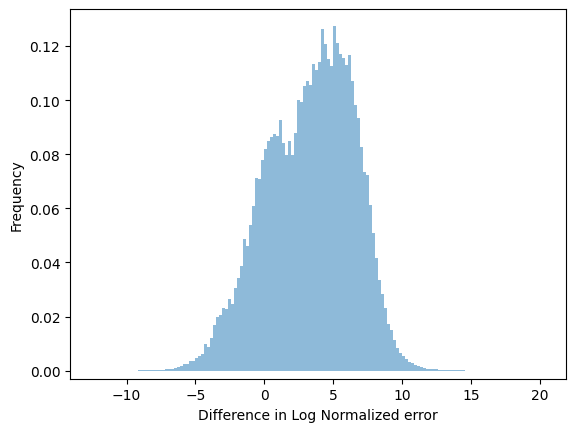

In [13]:
pruning_errors=((truth-pred)**2/std**2).flatten()
no_pruning_errors=((diffs_no_pruning)**2/std**2).flatten()

plt.hist(np.log10(no_pruning_errors)-np.log10(pruning_errors),bins=150,alpha=0.5,label='with pruning',density=True)


plt.xlabel('Difference in Log Normalized error')
plt.ylabel('Frequency')
plt.ylim(bottom=-0.003)
#plt.legend()
plt.show()